
The following code is associated to Paper 1 in the Report and the Powerpoint
This code's focus is on the RandomForest algorithm
Author: Annelyse Tycholis | 30009090

References:
[1] https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?datasetId=228
[2] https://paperswithcode.com/paper/performance-accuration-method-of-machine
[3] https://www.kaggle.com/code/basit7/pima-dataset-random-forest-classifier-84-4


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
# Read Data
data = pd.read_csv("/content/diabetes.csv")
# Data contents
data.head()

In [56]:
# Isolate Features + labels 
features, labels = data.iloc[:, :-1],  data.iloc[:, [-1]]

In [57]:
# Divide the dataset into training = 75% + test = 25% sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [58]:
# Recreation of the exact Model from the Paper
RFC_paper = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, max_features=4, random_state=0).fit(x_train, y_train.values.ravel())

In [ ]:
# Model Results
print("Accuracy on Test Set from Methods in Paper: ", round(RFC_paper.score(x_test, y_test)*100, 1), "\n")

y_pred = RFC_paper.predict(x_test)

print("Classification report:\n")

print("{}".format(classification_report(y_test,y_pred)))

# Confusion Matrix Depicting Efficacy of the Model based on the Predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(False)

In [ ]:
# All Cells Below Correspond to Modifications Made to What was Proposed by the Authors 
# Data Visualization prior to preprocessing
sns.pairplot(data=data,hue='Outcome')

In [61]:
# Modification 1: Preprocessing - replacing rows with 0 values to mean or median
data['Glucose']=np.where(data['Glucose']==0, data['Glucose'].mean(),data['Glucose'])
data['BloodPressure']=np.where(data['BloodPressure']==0,data['BloodPressure'].mean(),data['BloodPressure'])
data['SkinThickness']=np.where(data['SkinThickness']==0,data['SkinThickness'].mean(),data['SkinThickness'])
data['BMI']=np.where(data['BMI']==0,data['BMI'].mean(),data['BMI'])


In [65]:
# Re-organize the dataset following preprocessing + Re-split
# Features + labels 
features, labels = data.iloc[:, :-1],  data.iloc[:, [-1]]

# Divide dataset training = 75% & test = 25%
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

In [66]:
# Scale Features for Better Performance
scaling_x=StandardScaler()
x_train=scaling_x.fit_transform(x_train)
x_test=scaling_x.transform(x_test)

In [67]:
# Parameter Setup for Hypertuning the RF Model
# Number of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in each tree
max_depth = [int(x) for x in np.linspace(120, 140, 160)]
# Minimum number of samples required to split a node
min_samples_split = [10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10, 20, 40]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini'],
               'bootstrap':[True, False],
               'max_leaf_nodes':[5, 7, 10],}
print(random_grid)

{'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [120, 120, 120, 120, 120, 120, 120, 120, 121, 121, 121, 121, 121, 121, 121, 121, 122, 122, 122, 122, 122, 122, 122, 122, 123, 123, 123, 123, 123, 123, 123, 123, 124, 124, 124, 124, 124, 124, 124, 124, 125, 125, 125, 125, 125, 125, 125, 125, 126, 126, 126, 126, 126, 126, 126, 126, 127, 127, 127, 127, 127, 127, 127, 127, 128, 128, 128, 128, 128, 128, 128, 128, 129, 129, 129, 129, 129, 129, 129, 129, 130, 130, 130, 130, 130, 130, 130, 130, 131, 131, 131, 131, 131, 131, 131, 131, 132, 132, 132, 132, 132, 132, 132, 132, 133, 133, 133, 133, 133, 133, 133, 133, 134, 134, 134, 134, 134, 134, 134, 134, 135, 135, 135, 135, 135, 135, 135, 135, 136, 136, 136, 136, 136, 136, 136, 136, 137, 137, 137, 137, 137, 137, 137, 137, 138, 138, 138, 138, 138, 138, 138, 138, 139, 139, 139, 139, 139, 139, 139, 140], 'min_samples_split': [10, 20, 40], 'min_samples_leaf': [10, 20, 

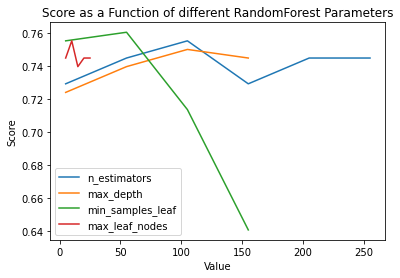

In [72]:
# The following graphs were used to estimate the best possible values for each parameter of the 
# RandomForest Algorithm that was ultimately used in the parameter setup in the above cell

# Cross Validation for Number of Estimators
i = 5
x = list()
y = list()
while i < 300:
  RFC = RandomForestClassifier(n_estimators=i).fit(x_train, y_train.values.ravel())
  x.append(i)
  y.append(RFC.score(x_test, y_test))
  i = i+50

plt.plot(x,y, label='n_estimators')

# Cross Validation for Max Depth 
i = 5
x = list()
y = list()
while i < 200:
  RFC = RandomForestClassifier(max_depth=i).fit(x_train, y_train.values.ravel())
  x.append(i)
  y.append(RFC.score(x_test, y_test))
  i = i+50

plt.plot(x,y, label='max_depth')

# Cross Validation for Min Leaf Samples
i = 5
x = list()
y = list()
while i < 200:
  RFC = RandomForestClassifier( min_samples_leaf=i).fit(x_train, y_train.values.ravel())
  x.append(i)
  y.append(RFC.score(x_test, y_test))
  i = i+50

plt.plot(x,y, label='min_samples_leaf')

# Cross Validation for Max Leaf Nodes
i = 5
x = list()
y = list()
while i < 30:
  RFC = RandomForestClassifier(max_leaf_nodes=i).fit(x_train, y_train.values.ravel())
  x.append(i)
  y.append(RFC.score(x_test, y_test))
  i = i+5

plt.plot(x,y, label='max_leaf_nodes')
plt.title('Score as a Function of different RandomForest Parameters')
plt.xlabel('Value')
plt.ylabel('Score')
plt.legend()

In [73]:
# Building the RandomizedSearchCV using the random grid containing the RF parameter values in the above cell
# n_ter is the number of parameters sampled and scored using a stratified k-fold split (cv=3) validation technique

RFC_mod=RandomForestClassifier()
RFC_randomscv=RandomizedSearchCV(estimator=RFC_mod,param_distributions=random_grid,n_iter=22,cv=3,
                               random_state=0,n_jobs=-1)
RFC_randomscv.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=22,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [120, 120, 120, 120, 120,
                                                      120, 120, 120, 121, 121,
                                                      121, 121, 121, 121, 121,
                                                      121, 122, 122, 122, 122,
                                                      122, 122, 122, 122, 123,
                                                      123, 123, 123, 123, 123, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [5, 7, 10],
                                        'min_samples_leaf': [10, 20

In [74]:
# Note re-running this provides different "best" parameters associated to each random run from the above cell - this will likely not reflect the parameters detailed in the paper
RFC_randomscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 40,
 'min_samples_leaf': 20,
 'max_leaf_nodes': 7,
 'max_features': 'sqrt',
 'max_depth': 139,
 'criterion': 'gini',
 'bootstrap': True}

In [75]:
# Output
best_grid=RFC_randomscv.best_estimator_

In [76]:
from sklearn.metrics import confusion_matrix

# Result from the Proposed Modifications
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred), "\n")
print("Accuracy Score from Proposed Modifications {}%".format(round(accuracy_score(y_test,y_pred)*100, 1)), "\n")
print("Classification Report for Proposed Modifications:\n")
print("{}".format(classification_report(y_test,y_pred)))

[[108  15]
 [ 31  38]] 

Accuracy Score from Proposed Modifications 76.0% 

Classification Report for Proposed Modifications:

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       123
           1       0.72      0.55      0.62        69

    accuracy                           0.76       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.76      0.76      0.75       192



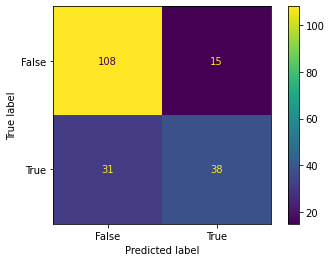

In [77]:
# Result Continued 

confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.grid(False)